# Phase - 1: Data analysis & preparation


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Viewing the data


In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [4]:
df.shape

(1190, 12)

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [8]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Correlations and data distribution


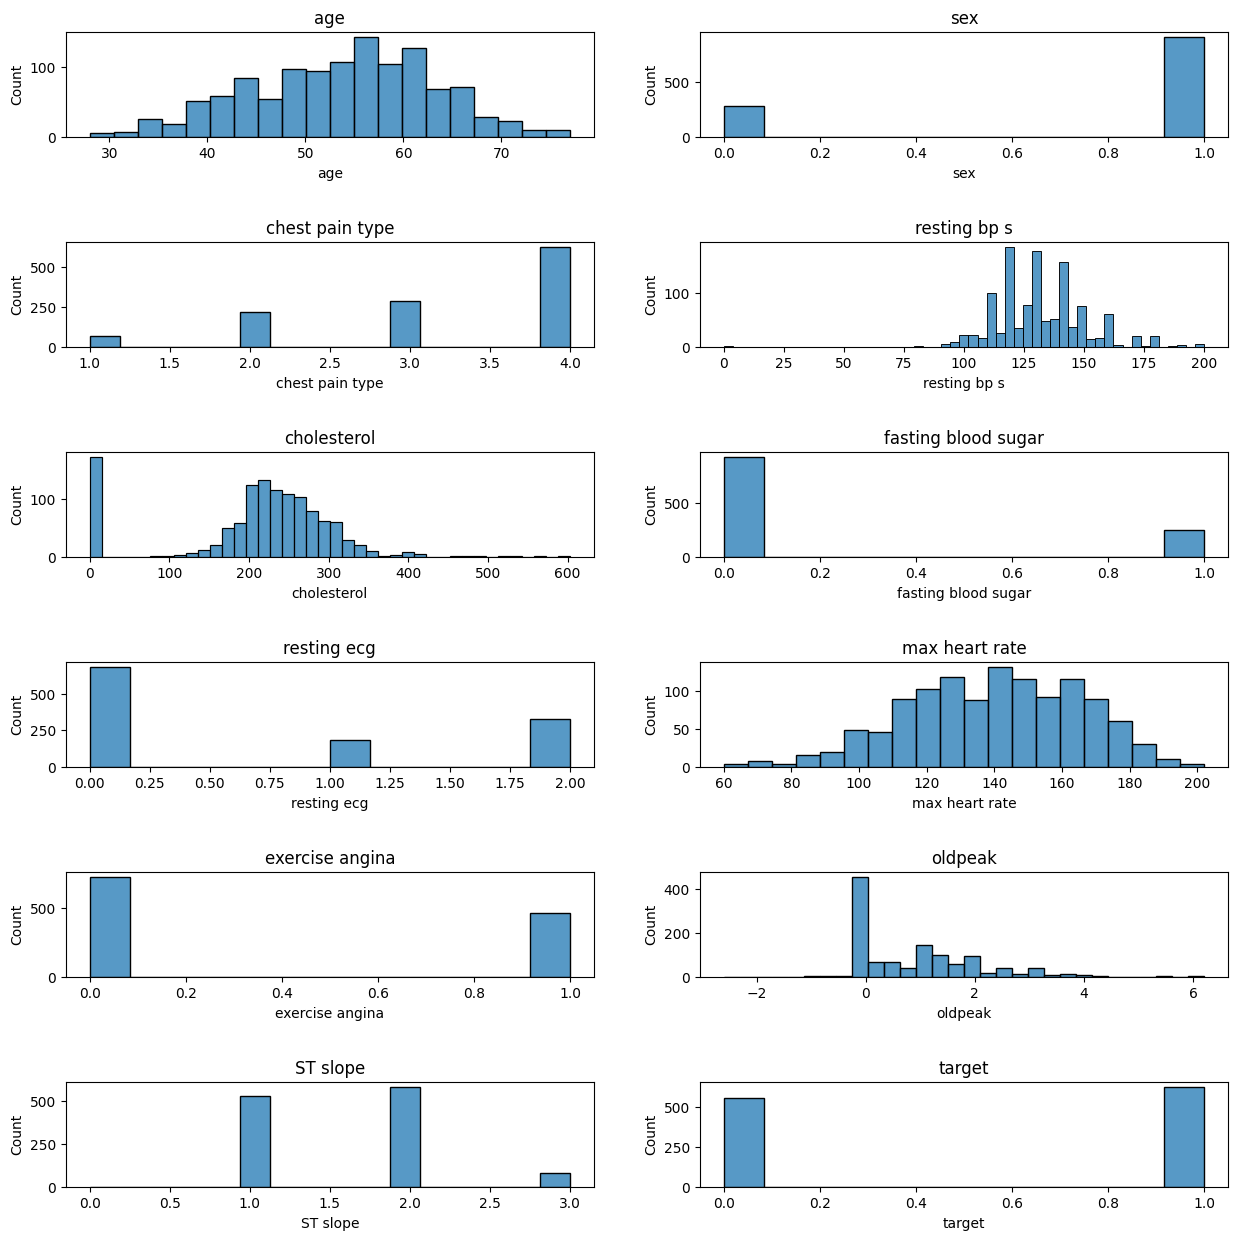

In [9]:
plt.figure(figsize=(15,15))
plt_index = 1
for c_name, content in df.items():
  ax = plt.subplot(6,2, plt_index)
  plt.subplots_adjust(hspace = 1)
  sns.histplot(content, ax=ax)
  plt.title(c_name)
  plt_index += 1

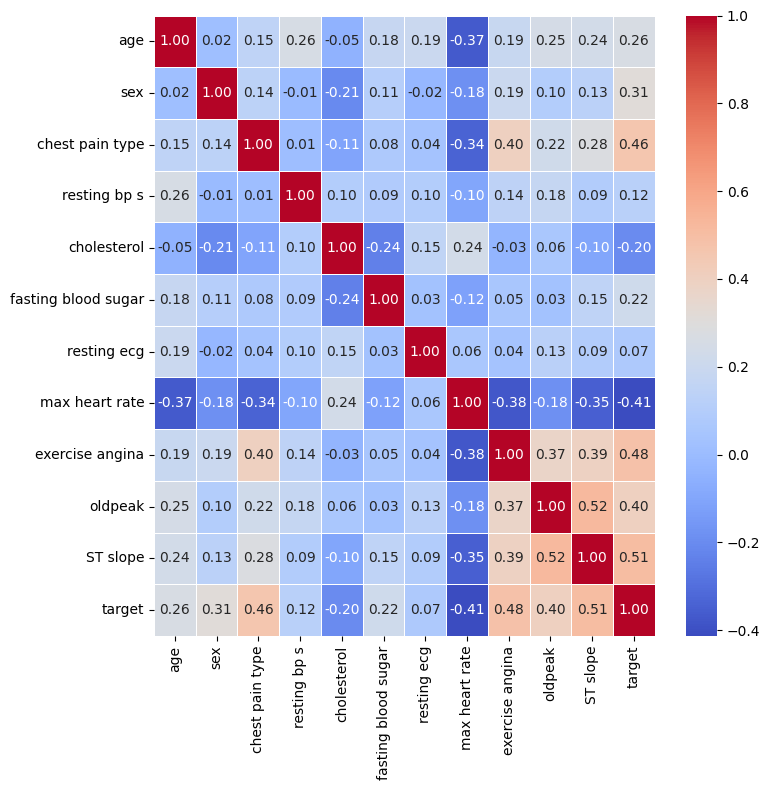

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [11]:
df["target"].value_counts()

,count
target,
1,629
0,561


## Shuffle, np conversion, and splitting

In [12]:
# set numpy print options
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [13]:
# convert DF to numpy array for normalizing
np_data = df.to_numpy()
np_data[:5, :]

array([[ 40.00,  1.00,  2.00,  140.00,  289.00,  0.00,  0.00,  172.00,
         0.00,  0.00,  1.00,  0.00],
       [ 49.00,  0.00,  3.00,  160.00,  180.00,  0.00,  0.00,  156.00,
         0.00,  1.00,  2.00,  1.00],
       [ 37.00,  1.00,  2.00,  130.00,  283.00,  0.00,  1.00,  98.00,
         0.00,  0.00,  1.00,  0.00],
       [ 48.00,  0.00,  4.00,  138.00,  214.00,  0.00,  0.00,  108.00,
         1.00,  1.50,  2.00,  1.00],
       [ 54.00,  1.00,  3.00,  150.00,  195.00,  0.00,  0.00,  122.00,
         0.00,  0.00,  1.00,  0.00]])

In [14]:
import random
np.random.shuffle(np_data)

In [15]:
# just checking shuffle
np_data[:5, :]

array([[ 44.00,  1.00,  4.00,  135.00,  491.00,  0.00,  0.00,  135.00,
         0.00,  0.00,  2.00,  1.00],
       [ 61.00,  0.00,  4.00,  130.00,  330.00,  0.00,  2.00,  169.00,
         0.00,  0.00,  1.00,  1.00],
       [ 38.00,  1.00,  3.00,  115.00,  0.00,  0.00,  0.00,  128.00,
         1.00,  0.00,  2.00,  1.00],
       [ 57.00,  1.00,  4.00,  95.00,  0.00,  1.00,  0.00,  182.00,
         0.00,  0.70,  3.00,  1.00],
       [ 64.00,  1.00,  4.00,  144.00,  0.00,  0.00,  1.00,  122.00,
         1.00,  1.00,  2.00,  1.00]])

In [16]:
# integer for splitting the data in the next steps
index_20percent = int(0.2 * len(np_data[:, 0]))
index_20percent

238

In [17]:
# remove last column (target)
XVALID = np_data[:index_20percent, :-1]
YVALID = np_data[:index_20percent, -1]

XTRAIN = np_data[index_20percent:, :-1]
YTRAIN = np_data[index_20percent:, -1]

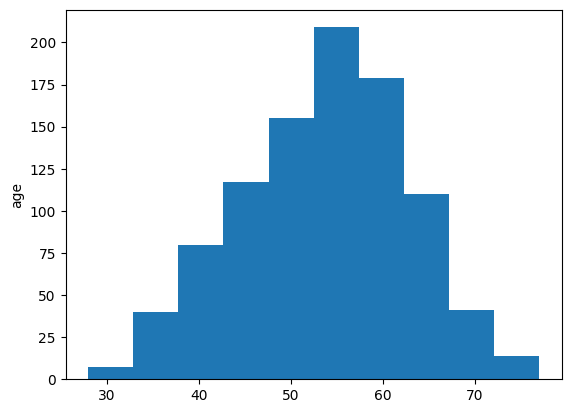

In [18]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('age')
plt.show()

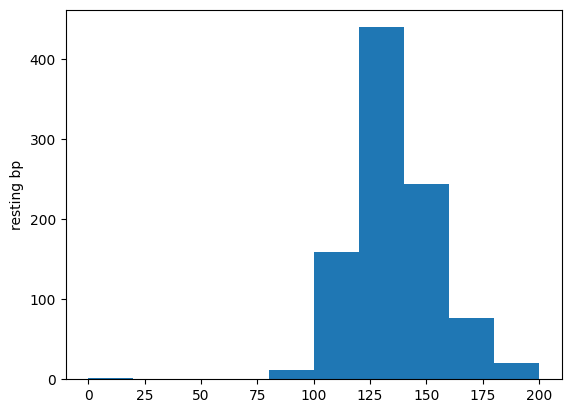

In [19]:
plt.hist(XTRAIN[:, 3])
plt.ylabel('resting bp')
plt.show()

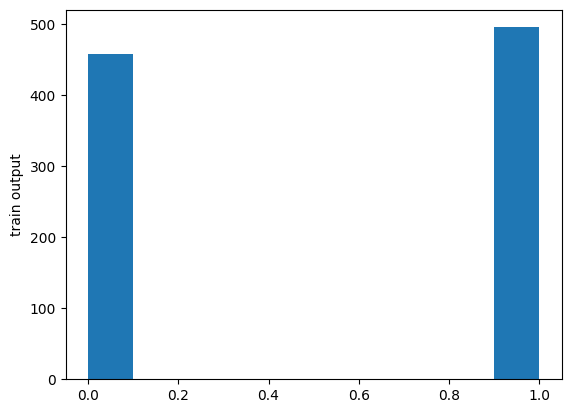

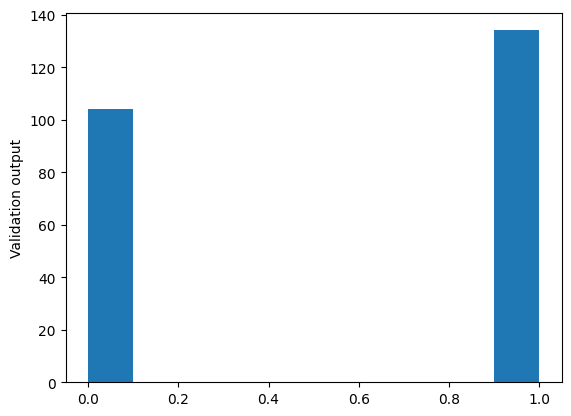

In [20]:
plt.hist(YTRAIN)
plt.ylabel('train output')
plt.show()

plt.hist(YVALID)
plt.ylabel('Validation output')
plt.show()

In [21]:
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)

XTRAIN -= mean
XTRAIN /= std

XVALID -= mean
XVALID /= std

In [22]:
print(mean)
print(std)

[ 53.70  0.77  3.22  132.28  208.96  0.21  0.68  139.93  0.39  0.93  1.62]
[ 9.24  0.42  0.94  18.53  99.32  0.41  0.86  25.45  0.49  1.10  0.62]


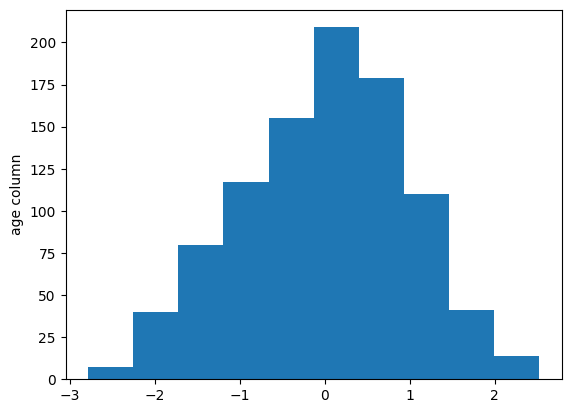

In [23]:
# verify the values are normalize between 0 and 1
plt.hist(XTRAIN[:, 0])
plt.ylabel('age column')
plt.show()

# Phase - 2: Intentional Overfit
- For this phase **do not** split data into training and validation


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [25]:
X = np_data[:, :-1]
Y = np_data[:, -1]

In [26]:
print(X.shape, Y.shape)
print(X.shape[1])

(1190, 11) (1190,)
11


## Overfit with 1 neuron (No overfit ~83% acc)
- 256 epochs

In [27]:
# set up network architecture
model = Sequential(name="overfit_one_neuron")
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [28]:
model.fit(X, Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 1s 1ms/step - loss: 1.1680 - accuracy: 0.3101
Epoch 2/256
38/38 [==============================] - 0s 1ms/step - loss: 1.0771 - accuracy: 0.3361
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.9970 - accuracy: 0.3672
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.9226 - accuracy: 0.4143
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.8534 - accuracy: 0.4622
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.7927 - accuracy: 0.5210
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.7378 - accuracy: 0.5874
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.6345
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6706
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7151
Epoch 11/

## Overfit with a 2x1 network (No overfit ~85% acc)
- 256 epochs

In [29]:
# add more neurons
overfit_model = Sequential(name="overfit_2x1")
overfit_model.add(Input(shape=(X.shape[1],)))
overfit_model.add(Dense(2, activation='relu'))
overfit_model.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
overfit_model.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 0s 1ms/step - loss: 0.7482 - accuracy: 0.4571
Epoch 2/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.6487
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6983
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.7496
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.7681
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7832
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.7924
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.7950
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.8000
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.8042
Epoch 11/

## Overfit with 8x1 network (No overfit ~90% acc)
- 256 epochs

In [31]:
# add more neurons
overfit_model_2 = Sequential(name="overfit_8x1")
overfit_model_2.add(Input(shape=(X.shape[1],)))
overfit_model_2.add(Dense(8, activation='relu'))
overfit_model_2.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_2.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7782
Epoch 2/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8008
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8042
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8126
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8118
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8151
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8193
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8261
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8294
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8294
Epoch 11/

## Overfit 8x4x1 (No overfit ~90% acc)
- 256 epochs

In [32]:
# add more neurons and another layer
overfit_model_3 = Sequential(name="overfit_8x4x1")
overfit_model_3.add(Input(shape=(X.shape[1],)))
overfit_model_3.add(Dense(8, activation='relu'))
overfit_model_3.add(Dense(4, activation='relu'))
overfit_model_3.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# fit model
overfit_model_3.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5891
Epoch 2/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6966
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.7521
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7706
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.7908
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7983
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8050
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.8092
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.8126
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.8143
Epoch 11/

## Overfit 64x4x1 (success)
- 256 epochs

In [33]:
# add more neurons to first layer
overfit_model_4 = Sequential(name="overfit_64x4x1")
overfit_model_4.add(Input(shape=(X.shape[1],)))
overfit_model_4.add(Dense(64, activation='relu'))
overfit_model_4.add(Dense(4, activation='relu'))
overfit_model_4.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_4.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_4.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6782
Epoch 2/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7866
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8151
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8311
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8395
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8395
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8487
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8521
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8571
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8605
Epoch 11/

## Overfit 64x32x1 (success)
- 100 epochs

In [34]:
# add more neurons
overfit_model_5 = Sequential(name="overfit_64x32x1")
overfit_model_5.add(Input(shape=(X.shape[1],)))
overfit_model_5.add(Dense(64, activation='relu'))
overfit_model_5.add(Dense(32, activation='relu'))
overfit_model_5.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_5.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_5.fit(X,Y, epochs=100, verbose=1)

Epoch 1/100
38/38 [==============================] - 1s 1ms/step - loss: 0.5720 - accuracy: 0.7563
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8176
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8395
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8429
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8479
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8546
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8588
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8622
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8655
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8655
Epoch 11/

## Overfit 500x1 (success)
- 256 epochs

In [35]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(500, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8025
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8395
Epoch 3/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8412
Epoch 4/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8496
Epoch 5/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8546
Epoch 6/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8622
Epoch 7/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8630
Epoch 8/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8689
Epoch 9/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8756
Epoch 10/256
38/38 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8790
Epoch 11/

In [36]:
# add more neurons
overfit_model_6 = Sequential(name="overfit_mode_6")
overfit_model_6.add(Input(shape=(X.shape[1],)))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(8, activation='relu'))
overfit_model_6.add(Dense(1, activation='sigmoid'))

# compile new overfit model
overfit_model_6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

overfit_model_6.fit(X,Y, epochs=256, verbose=1)

Epoch 1/256
38/38 [==============================] - 1s 2ms/step - loss: 0.6102 - accuracy: 0.7622
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7723
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7832
Epoch 4/256
38/38 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7924
Epoch 5/256
38/38 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8017
Epoch 6/256
38/38 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8101
Epoch 7/256
38/38 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8176
Epoch 8/256
38/38 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8235
Epoch 9/256
38/38 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8286
Epoch 10/256
38/38 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8277
Epoch 11/

# Phase 3 - Model selection & evaluation
- Goal: obtain highest possible acc on validation set

In [37]:
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [38]:
# double check train and validation sets
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)

(952, 11) (952,)
(238, 11) (238,)


## Create metric classes and model callbacks
- Accuracy, Precision, Recall, F1Score

In [39]:
prec = Precision()
rec = Recall()
f1 = F1Score()

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(filepath = 'model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')

## Create a neural network logistic regression model
- One output neuron with sigmoid
- val_accuracy: 0.8319
- val_loss: 0.3709
- val_precision: 0.8382
- val_recall: 0.8636

In [41]:
baseline_regression_model = Sequential(name="baseline_regression_model")
baseline_regression_model.add(Input(shape=(X.shape[1],)))
baseline_regression_model.add(Dense(1, activation='sigmoid'))
# compile the model
baseline_regression_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])


In [42]:
history = baseline_regression_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 13s - loss: 1.3697 - accuracy: 0.1875 - precision: 0.2778 - recall: 0.2778
Epoch 1: val_loss improved from inf to 1.15263, saving model to model.keras
30/30 [==============================] - 1s 11ms/step - loss: 1.2222 - accuracy: 0.2763 - precision: 0.3028 - recall: 0.3010 - val_loss: 1.1526 - val_accuracy: 0.3193 - val_precision: 0.3772 - val_recall: 0.3209
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 1.0499 - accuracy: 0.4375 - precision: 0.4375 - recall: 0.4375
Epoch 2: val_loss improved from 1.15263 to 1.08000, saving model to model.keras
30/30 [==============================] - 0s 4ms/step - loss: 1.1425 - accuracy: 0.2973 - precision: 0.3239 - recall: 0.3232 - val_loss: 1.0800 - val_accuracy: 0.3403 - val_precision: 0.3982 - val_recall: 0.3358
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 1.0779 - accuracy: 0.3125 - precision: 0.3125 - recall: 0.3125
Epoch 3: val_loss improv

## Model 16x8x1
- val_accuracy: 0.8908
- val_loss: 0.3069
- val_precision: 0.9015
- val_recall: 0.9015

In [43]:
three_layer_model = Sequential(name="16x8x1_model")
three_layer_model.add(Input(shape=(X.shape[1],)))
three_layer_model.add(Dense(16, activation='relu'))
three_layer_model.add(Dense(8, activation='relu'))
three_layer_model.add(Dense(1, activation='sigmoid'))
# compile the model
three_layer_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
three_layer_history = three_layer_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 17s - loss: 0.7054 - accuracy: 0.6250 - precision: 0.8289 - recall: 0.8400
Epoch 1: val_loss did not improve from 0.36897
30/30 [==============================] - 1s 10ms/step - loss: 0.6251 - accuracy: 0.6933 - precision: 0.6965 - recall: 0.8426 - val_loss: 0.5706 - val_accuracy: 0.7563 - val_precision: 0.7794 - val_recall: 0.7910
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.6167 - accuracy: 0.5938 - precision: 0.5294 - recall: 0.6429
Epoch 2: val_loss did not improve from 0.36897
30/30 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7647 - precision: 0.7571 - recall: 0.8061 - val_loss: 0.5113 - val_accuracy: 0.8109 - val_precision: 0.8450 - val_recall: 0.8134
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.4792 - accuracy: 0.8125 - precision: 0.8571 - recall: 0.8571
Epoch 3: val_loss did not improve from 0.36897
30/30 [==============================] 

## Model 8x8x8x1

In [44]:
all_eights_model = Sequential(name="all_eights_model")
all_eights_model.add(Input(shape=(X.shape[1],)))
all_eights_model.add(Dense(8, activation='relu'))
all_eights_model.add(Dense(8, activation='relu'))
all_eights_model.add(Dense(8, activation='relu'))
all_eights_model.add(Dense(1, activation='sigmoid'))
# compile the model
all_eights_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
all_eights_history = all_eights_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 19s - loss: 0.6820 - accuracy: 0.5938 - precision: 0.8355 - recall: 0.8639
Epoch 1: val_loss did not improve from 0.28055
30/30 [==============================] - 1s 11ms/step - loss: 0.6228 - accuracy: 0.6691 - precision: 0.6836 - recall: 0.8347 - val_loss: 0.5822 - val_accuracy: 0.7437 - val_precision: 0.7325 - val_recall: 0.8582
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6875 - precision: 0.6316 - recall: 0.8000
Epoch 2: val_loss did not improve from 0.28055
30/30 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7311 - precision: 0.6995 - recall: 0.8465 - val_loss: 0.5403 - val_accuracy: 0.7647 - val_precision: 0.7786 - val_recall: 0.8134
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.5492 - accuracy: 0.7500 - precision: 0.7000 - recall: 0.8750
Epoch 3: val_loss did not improve from 0.28055
30/30 [==============================] 

## Model 8x4x1

In [45]:
eightxfourxone_model = Sequential(name="8x4x1_model")
eightxfourxone_model.add(Input(shape=(X.shape[1],)))
eightxfourxone_model.add(Dense(8, activation='relu'))
eightxfourxone_model.add(Dense(4, activation='relu'))
eightxfourxone_model.add(Dense(1, activation='sigmoid'))
# compile the model
eightxfourxone_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
eightxfourxone_history = eightxfourxone_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 16s - loss: 0.7090 - accuracy: 0.5938 - precision: 0.8509 - recall: 0.8896
Epoch 1: val_loss did not improve from 0.28055
30/30 [==============================] - 1s 10ms/step - loss: 0.7190 - accuracy: 0.5032 - precision: 0.5614 - recall: 0.9300 - val_loss: 0.6770 - val_accuracy: 0.5588 - val_precision: 0.5656 - val_recall: 0.9328
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.6998 - accuracy: 0.4688 - precision: 0.5000 - recall: 0.8824
Epoch 2: val_loss did not improve from 0.28055
30/30 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.5399 - precision: 0.5323 - recall: 0.9475 - val_loss: 0.6415 - val_accuracy: 0.5840 - val_precision: 0.5814 - val_recall: 0.9328
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.7399 - accuracy: 0.5312 - precision: 0.5185 - recall: 0.8750
Epoch 3: val_loss did not improve from 0.28055
30/30 [==============================] 

## Model 8x1
- val_accuracy: 0.8193
- val_loss: 0.3666
- val_precision: 0.8346
- val_recall: 0.8409

In [46]:
eightx1_model = Sequential(name="8x1_model")
eightx1_model.add(Input(shape=(X.shape[1],)))
eightx1_model.add(Dense(8, activation='relu'))
eightx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
eightx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
eightx1_history = eightx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 14s - loss: 0.9243 - accuracy: 0.3438 - precision: 0.8467 - recall: 0.7582
Epoch 1: val_loss did not improve from 0.28055
30/30 [==============================] - 1s 10ms/step - loss: 0.7013 - accuracy: 0.5557 - precision: 0.7172 - recall: 0.4436 - val_loss: 0.6917 - val_accuracy: 0.5714 - val_precision: 0.7500 - val_recall: 0.3582
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.5851 - accuracy: 0.6875 - precision: 0.8000 - recall: 0.5000
Epoch 2: val_loss did not improve from 0.28055
30/30 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6481 - precision: 0.7685 - recall: 0.4626 - val_loss: 0.6321 - val_accuracy: 0.6345 - val_precision: 0.8219 - val_recall: 0.4478
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6875 - precision: 0.7500 - recall: 0.6667
Epoch 3: val_loss did not improve from 0.28055
30/30 [==============================] 

## Model 4x1
- val_accuracy: 0.8361
- val_loss: 0.4390
- val_precision: 0.8298
- val_recall: 0.8864

In [47]:
fourx1_model = Sequential(name="4x1_model")
fourx1_model.add(Input(shape=(X.shape[1],)))
fourx1_model.add(Dense(4, activation='relu'))
fourx1_model.add(Dense(1, activation='sigmoid'))
# compile the model
fourx1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
fourx1_history = fourx1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 14s - loss: 0.9306 - accuracy: 0.3438 - precision: 0.8000 - recall: 0.8322
Epoch 1: val_loss did not improve from 0.28055
30/30 [==============================] - 1s 9ms/step - loss: 0.8762 - accuracy: 0.4748 - precision: 0.5554 - recall: 0.7488 - val_loss: 0.8039 - val_accuracy: 0.5042 - val_precision: 0.5488 - val_recall: 0.6716
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.8895 - accuracy: 0.4375 - precision: 0.4400 - recall: 0.7333
Epoch 2: val_loss did not improve from 0.28055
30/30 [==============================] - 0s 3ms/step - loss: 0.7915 - accuracy: 0.5147 - precision: 0.5242 - recall: 0.7232 - val_loss: 0.7373 - val_accuracy: 0.5336 - val_precision: 0.5752 - val_recall: 0.6567
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.8237 - accuracy: 0.4375 - precision: 0.4091 - recall: 0.6429
Epoch 3: val_loss did not improve from 0.28055
30/30 [==============================] -

## Model 2x1
- val_accuracy: 0.8277
- val_loss: 0.4333
- val_precision: 0.8273
- val_recall: 0.8712

In [48]:
twox1_model = Sequential(name="2x1_model")
twox1_model.add(Input(shape=(X.shape[1],)))
twox1_model.add(Dense(2, activation='relu'))
twox1_model.add(Dense(1, activation='sigmoid'))
# compile the model
twox1_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
twox1_history = twox1_model.fit(XTRAIN, YTRAIN, epochs=256, verbose=1, validation_data=(XVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/256
 1/30 [>.............................] - ETA: 14s - loss: 0.8907 - accuracy: 0.3750 - precision: 0.8357 - recall: 0.7748
Epoch 1: val_loss did not improve from 0.28055
30/30 [==============================] - 1s 9ms/step - loss: 0.7491 - accuracy: 0.5105 - precision: 0.6071 - recall: 0.5676 - val_loss: 0.7226 - val_accuracy: 0.5000 - val_precision: 0.5641 - val_recall: 0.4925
Epoch 2/256
 1/30 [>.............................] - ETA: 0s - loss: 0.6079 - accuracy: 0.5625 - precision: 0.6000 - recall: 0.5294
Epoch 2: val_loss did not improve from 0.28055
30/30 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.5441 - precision: 0.5688 - recall: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.5378 - val_precision: 0.6071 - val_recall: 0.5075
Epoch 3/256
 1/30 [>.............................] - ETA: 0s - loss: 0.7487 - accuracy: 0.5000 - precision: 0.5882 - recall: 0.5263
Epoch 3: val_loss did not improve from 0.28055
30/30 [==============================] -

In [49]:
twox1_history.params

{'verbose': 1, 'epochs': 256, 'steps': 30}

## Plot learning curves

In [50]:
def plot_learning_curves(history, title):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title(title)
  plt.legend(['training data', 'validation data'], loc='lower right')
  plt.show()

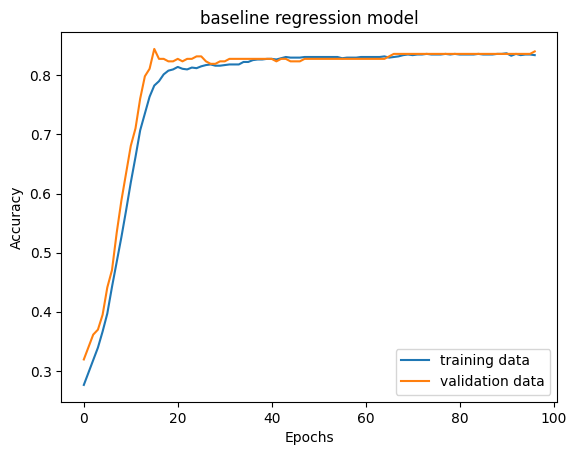

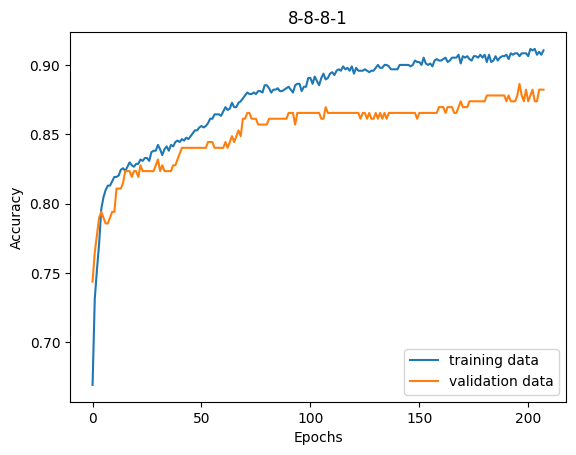

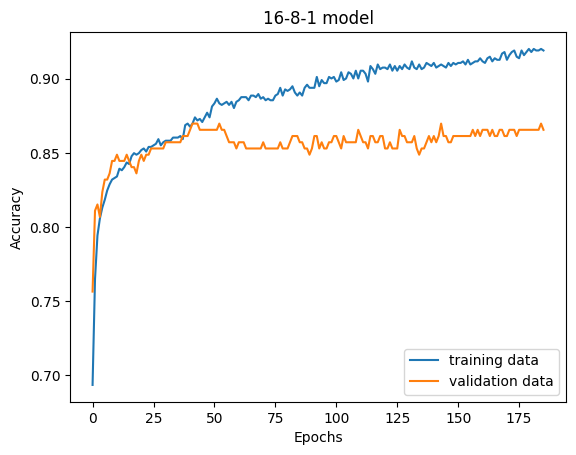

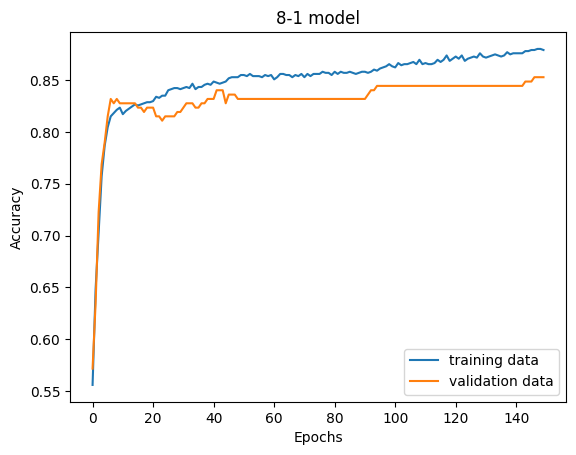

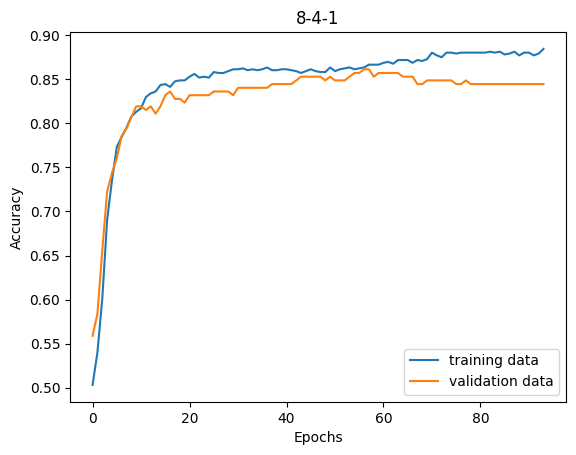

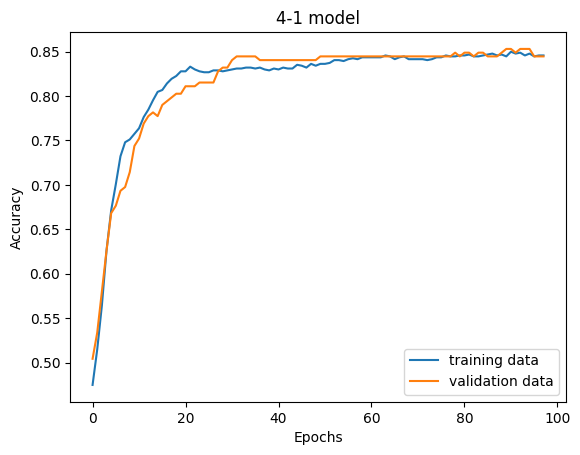

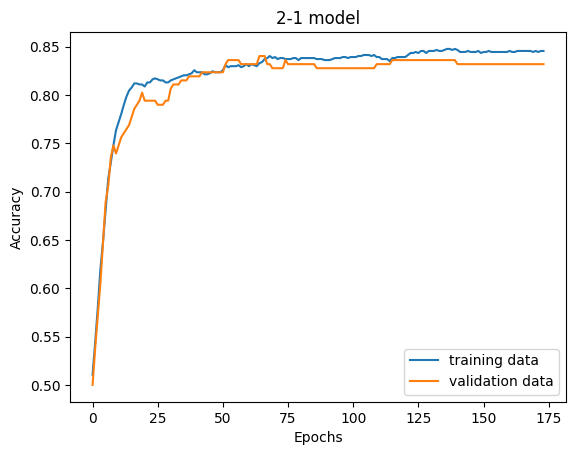

In [51]:
plot_learning_curves(history, "baseline regression model")
plot_learning_curves(all_eights_history, "8-8-8-1")
plot_learning_curves(three_layer_history, "16-8-1 model")
plot_learning_curves(eightx1_history, "8-1 model")
plot_learning_curves(eightxfourxone_history, "8-4-1")
plot_learning_curves(fourx1_history, "4-1 model")
plot_learning_curves(twox1_history, "2-1 model")

## Plot loss of best model
- 16-8-1

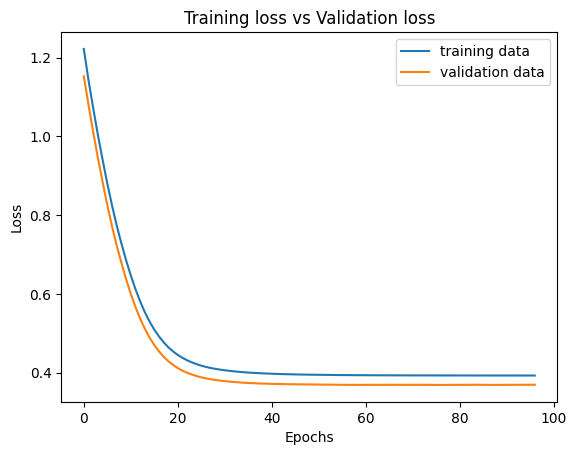

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss vs Validation loss')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

## Load best model from checkpoint file for manual predictions (GRAD student only work)
- Requirement: **build your own function/method that serves as a prediction model**
- Verify predictions are the same

In [53]:
from keras.saving import load_model
best_model = load_model('model.keras')

In [54]:
# double check it is the 16-8-1 model
best_model.name

'16x8x1_model'

In [55]:
# check the summary
best_model.summary()

Model: "16x8x1_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                192       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# gives us the shape of the weights (11,16) for the weight kernel and (16,) for the bias
# which makes sense since the layer is 16 neurons and input is 11 features
best_model.layers[0].weights

[<tf.Variable 'dense_23/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-0.32, -0.19,  0.33, -0.92, -0.14,  0.05,  0.09,  0.13,  0.15,
          0.41, -0.13,  0.52,  0.00, -0.54, -0.26, -0.16],
        [-0.34,  0.46,  0.46,  0.02,  0.43,  0.21, -0.10, -0.10,  0.15,
         -0.34,  0.32, -0.61,  0.21, -0.29, -0.15, -0.28],
        [-0.62,  0.46, -0.71, -0.16, -0.10,  0.15, -0.03,  1.01,  0.01,
          0.15, -0.11,  0.19, -0.81,  0.02, -0.29,  0.33],
        [-0.47,  0.05, -0.26, -0.15,  0.12,  0.07,  0.47,  0.07,  0.20,
         -0.15, -0.91, -0.11,  0.26, -0.26,  0.05, -0.39],
        [ 0.01, -0.06, -0.72, -0.66, -0.44,  0.62,  0.11, -0.42, -0.02,
          0.07,  0.02,  0.40, -0.08,  0.11, -0.31, -0.80],
        [-0.42,  0.33, -0.07,  0.81, -0.05, -0.14, -0.34, -0.07, -0.18,
         -0.45, -0.23,  0.08, -0.24,  0.46, -0.77,  0.69],
        [ 0.18,  0.04,  0.64,  0.17,  0.06,  0.03,  0.25, -0.29,  0.53,
         -0.52, -0.18,  0.38, -0.26, -0.17, -0.31, -0.18],
        [ 0.

In [57]:
from keras import activations

In [58]:
# Testing cell to see what various methods do
len(best_model.layers[0].get_weights()[0].T)

16

In [59]:
# Taken from Keras docs: output = activation(dot(input, kernel) + bias)
# used in hidden layers
def relu(x):
  return np.maximum(0,x)

# used in output layer
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def my_prediction_function(model, data):
  # this will be mutated between layers and end up as output
  output = data

  # iterate over the layers
  for keras_layer in model.layers:
    # transpose the weights and bias of current layer
    weights = keras_layer.get_weights()[0].T
    bias_list = keras_layer.get_weights()[1].T

    temporary_values = []
    for i in range(len(output)):
      neuron_outputs = [] # list to store neuron outputs
      for j in range(len(weights)):
        pre_activation = np.dot(output[i], weights[j]) + bias_list[j]

        # apply activatoin functions
        if keras_layer.activation == activations.sigmoid:
          activated_output = sigmoid(pre_activation)
        elif keras_layer.activation == activations.relu:
          activated_output = relu(pre_activation)
        else:
          activated_output = pre_activation # just linear without activation

        neuron_outputs.append(activated_output)

      temporary_values.append(neuron_outputs)
    # input for the next layer
    output = np.array(temporary_values)
  return output



## Test the manual prediction function

In [60]:
# manually using the weights and bias from the model to predict
my_prediction_function(best_model, XVALID)[:5]

array([[ 0.94],
       [ 0.18],
       [ 0.78],
       [ 1.00],
       [ 0.95]])

In [61]:
# actual model predictions
predictions = best_model.predict(XVALID)
predictions[:5].T

8/8 [==============================] - 0s 1ms/step


array([[ 0.94,  0.18,  0.78,  1.00,  0.95]], dtype=float32)

In [62]:
# actual values from dataset
true_values = np_data[:, -1]
true_values[:5]

array([ 1.00,  1.00,  1.00,  1.00,  1.00])

In [63]:
XVALID.shape

(238, 11)

# Phase 4 - Feature importance and reduction
- train models where each model only receives one feature at a time

In [64]:
#
print(XTRAIN.shape, YTRAIN.shape)
print(XVALID.shape, YVALID.shape)
print(best_model.name)
print(XTRAIN[:, 1].shape)

(952, 11) (952,)
(238, 11) (238,)
16x8x1_model
(952,)


In [65]:
#['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar',
# 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']

## model checkpoint callback

In [66]:
model_checkpoint = ModelCheckpoint(filepath = 'feature_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

## Age model - 16x8x1
- val_accuracy: 0.6471
- val_loss: 0.6520
- val_precision: 0.6567
- val_recall: 0.6984

In [67]:
age_model = Sequential(name="age_model")
age_model.add(Input(shape=(1,)))
age_model.add(Dense(16, activation='relu'))
age_model.add(Dense(8, activation='relu'))
age_model.add(Dense(1, activation='sigmoid'))
# compile the model
age_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
age_history = age_model.fit(XTRAIN[:, 0], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 0], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6933 - accuracy: 0.3750 - precision: 0.7560 - recall: 0.8699
Epoch 1: val_loss improved from inf to 0.67230, saving model to feature_model.keras
30/30 [==============================] - 1s 11ms/step - loss: 0.6700 - accuracy: 0.6334 - precision: 0.6846 - recall: 0.7075 - val_loss: 0.6723 - val_accuracy: 0.6092 - val_precision: 0.6519 - val_recall: 0.6567
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6842 - accuracy: 0.6875 - precision: 0.7778 - recall: 0.7000
Epoch 2: val_loss improved from 0.67230 to 0.67065, saving model to feature_model.keras
30/30 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6355 - precision: 0.6429 - recall: 0.6727 - val_loss: 0.6707 - val_accuracy: 0.6092 - val_precision: 0.6519 - val_recall: 0.6567
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6875 - precision: 0.7368 - recall: 0.7368
Epoch 3:

## Sex
- val_accuracy: 0.6849
- val_loss: 0.6165
- val_precision: 0.6441
- val_recall: 0.9048

In [68]:
sex_model = Sequential(name="sex_model")
sex_model.add(Input(shape=(1,)))
sex_model.add(Dense(16, activation='relu'))
sex_model.add(Dense(8, activation='relu'))
sex_model.add(Dense(1, activation='sigmoid'))
# compile the model
sex_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
sex_history = sex_model.fit(XTRAIN[:, 1], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 1], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 17s - loss: 0.6515 - accuracy: 0.7812 - precision: 0.6667 - recall: 0.6928
Epoch 1: val_loss improved from 0.67065 to 0.65250, saving model to feature_model.keras
30/30 [==============================] - 1s 12ms/step - loss: 0.6651 - accuracy: 0.6439 - precision: 0.6139 - recall: 0.8442 - val_loss: 0.6525 - val_accuracy: 0.6597 - val_precision: 0.6480 - val_recall: 0.8657
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6528 - accuracy: 0.6562 - precision: 0.6296 - recall: 0.9444
Epoch 2: val_loss improved from 0.65250 to 0.64654, saving model to feature_model.keras
30/30 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6439 - precision: 0.6068 - recall: 0.8949 - val_loss: 0.6465 - val_accuracy: 0.6597 - val_precision: 0.6480 - val_recall: 0.8657
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6250 - precision: 0.6000 - recall: 0.8824
Epoc

## Chest pain type
- val_accuracy: 0.7605
- val_loss: 0.5380
- val_precision: 0.7556
- val_recall: 0.8095

In [69]:
chest_model = Sequential(name="chest_model")
chest_model.add(Input(shape=(1,)))
chest_model.add(Dense(16, activation='relu'))
chest_model.add(Dense(8, activation='relu'))
chest_model.add(Dense(1, activation='sigmoid'))
# compile the model
chest_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
chest_history = chest_model.fit(XTRAIN[:, 2], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 2], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.7031 - accuracy: 0.5312 - precision: 0.6480 - recall: 0.7785
Epoch 1: val_loss did not improve from 0.64354
30/30 [==============================] - 1s 10ms/step - loss: 0.6821 - accuracy: 0.4800 - precision: 0.6480 - recall: 0.1844 - val_loss: 0.6759 - val_accuracy: 0.4370 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6744 - accuracy: 0.5312 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss did not improve from 0.64354
30/30 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.6008 - precision: 0.7700 - recall: 0.3313 - val_loss: 0.6644 - val_accuracy: 0.7899 - val_precision: 0.8281 - val_recall: 0.7910
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6369 - accuracy: 0.8125 - precision: 0.7692 - recall: 0.7692
Epoch 3: val_loss did not improve from 0.64354
30/30 [================

## Resting bp
- val_accuracy: 0.5882
- val_loss: 0.6704
- val_precision: 0.6400
- val_recall: 0.5079

In [70]:
bp_model = Sequential(name="bp_model")
bp_model.add(Input(shape=(1,)))
bp_model.add(Dense(16, activation='relu'))
bp_model.add(Dense(8, activation='relu'))
bp_model.add(Dense(1, activation='sigmoid'))
# compile the model
bp_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
bp_history = bp_model.fit(XTRAIN[:, 3], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 3], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 17s - loss: 0.7028 - accuracy: 0.4375 - precision: 0.8281 - recall: 0.6974
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6957 - accuracy: 0.5221 - precision: 0.6722 - recall: 0.3847 - val_loss: 0.6925 - val_accuracy: 0.5546 - val_precision: 0.6014 - val_recall: 0.6194
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5312 - precision: 0.4762 - recall: 0.7143
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5242 - precision: 0.5371 - recall: 0.6141 - val_loss: 0.6872 - val_accuracy: 0.5546 - val_precision: 0.6014 - val_recall: 0.6194
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6689 - accuracy: 0.6875 - precision: 0.6923 - recall: 0.6000
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## Cholesterol
- val_accuracy: 0.5798
- val_loss: 0.6686
- val_precision: 0.6806
- val_recall: 0.3889

In [71]:
ch_model = Sequential(name="ch_model")
ch_model.add(Input(shape=(1,)))
ch_model.add(Dense(16, activation='relu'))
ch_model.add(Dense(8, activation='relu'))
ch_model.add(Dense(1, activation='sigmoid'))
# compile the model
ch_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ch_history = ch_model.fit(XTRAIN[:, 4], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 4], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.7700 - accuracy: 0.4688 - precision: 0.6429 - recall: 0.4172
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.7238 - accuracy: 0.4559 - precision: 0.5117 - recall: 0.1733 - val_loss: 0.7158 - val_accuracy: 0.3782 - val_precision: 0.3750 - val_recall: 0.1567
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7136 - accuracy: 0.2812 - precision: 0.2857 - recall: 0.1000
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4149 - precision: 0.4176 - recall: 0.3172 - val_loss: 0.6960 - val_accuracy: 0.5630 - val_precision: 0.6172 - val_recall: 0.5896
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7064 - accuracy: 0.4688 - precision: 0.7143 - recall: 0.4348
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## Fasting blood sugar
- val_accuracy: 0.5924
- val_loss: 0.6534
- val_precision: 0.8222
- val_recall: 0.2937

In [72]:
bs_model = Sequential(name="bs_model")
bs_model.add(Input(shape=(1,)))
bs_model.add(Dense(16, activation='relu'))
bs_model.add(Dense(8, activation='relu'))
bs_model.add(Dense(1, activation='sigmoid'))
# compile the model
bs_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
bs_history = bs_model.fit(XTRAIN[:, 5], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 5], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6758 - accuracy: 0.6562 - precision: 0.6884 - recall: 0.6129
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6843 - accuracy: 0.5399 - precision: 0.5586 - recall: 0.7504 - val_loss: 0.6734 - val_accuracy: 0.5630 - val_precision: 0.7778 - val_recall: 0.3134
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6617 - accuracy: 0.5625 - precision: 1.0000 - recall: 0.3000
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5746 - precision: 0.7250 - recall: 0.2929 - val_loss: 0.6669 - val_accuracy: 0.5630 - val_precision: 0.7778 - val_recall: 0.3134
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6875 - precision: 0.7500 - recall: 0.2500
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## resting ecg
- val_accuracy: 0.5672
- val_loss: 0.6859
- val_precision: 0.6211
- val_recall: 0.4683

In [73]:
ecg_model = Sequential(name="ecg_model")
ecg_model.add(Input(shape=(1,)))
ecg_model.add(Dense(16, activation='relu'))
ecg_model.add(Dense(8, activation='relu'))
ecg_model.add(Dense(1, activation='sigmoid'))
# compile the model
ecg_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ecg_history = ecg_model.fit(XTRAIN[:, 6], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 6], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.7514 - accuracy: 0.4062 - precision: 0.6857 - recall: 0.3221
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.7073 - accuracy: 0.4632 - precision: 0.5437 - recall: 0.1383 - val_loss: 0.7013 - val_accuracy: 0.4370 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6966 - accuracy: 0.4062 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4926 - precision: 0.5306 - recall: 0.2101 - val_loss: 0.6941 - val_accuracy: 0.5168 - val_precision: 0.7879 - val_recall: 0.1940
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6941 - accuracy: 0.3438 - precision: 0.2857 - recall: 0.1111
Epoch 3: val_loss did not improve from 0.50927
30/30 [================

## max heart rate
- val_accuracy: 0.6345
- val_loss: 0.6337
- val_precision: 0.6696
- val_recall: 0.6111

In [74]:
heart_model = Sequential(name="heart_model")
heart_model.add(Input(shape=(1,)))
heart_model.add(Dense(16, activation='relu'))
heart_model.add(Dense(8, activation='relu'))
heart_model.add(Dense(1, activation='sigmoid'))
# compile the model
heart_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
heart_history = heart_model.fit(XTRAIN[:, 7], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 7], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6554 - accuracy: 0.4375 - precision: 0.5786 - recall: 0.5473
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6514 - accuracy: 0.5809 - precision: 0.5742 - recall: 0.7504 - val_loss: 0.6579 - val_accuracy: 0.6681 - val_precision: 0.7132 - val_recall: 0.6866
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5956 - accuracy: 0.6875 - precision: 0.8235 - recall: 0.6667
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6702 - precision: 0.6806 - recall: 0.6889 - val_loss: 0.6558 - val_accuracy: 0.6681 - val_precision: 0.7132 - val_recall: 0.6866
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6072 - accuracy: 0.7188 - precision: 0.7059 - recall: 0.7500
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## exercise angina
- val_accuracy: 0.7479
- val_loss: 0.5573
- val_precision: 0.8173
- val_recall: 0.6746

In [75]:
ang_model = Sequential(name="ang_model")
ang_model.add(Input(shape=(1,)))
ang_model.add(Dense(16, activation='relu'))
ang_model.add(Dense(8, activation='relu'))
ang_model.add(Dense(1, activation='sigmoid'))
# compile the model
ang_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
ang_history = ang_model.fit(XTRAIN[:, 8], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 8], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6775 - accuracy: 0.4375 - precision: 0.6471 - recall: 0.5946
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6440 - accuracy: 0.6744 - precision: 0.6971 - recall: 0.6439 - val_loss: 0.5965 - val_accuracy: 0.7647 - val_precision: 0.9149 - val_recall: 0.6418
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6368 - accuracy: 0.6875 - precision: 0.7692 - recall: 0.5882
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7185 - precision: 0.8093 - recall: 0.6000 - val_loss: 0.5640 - val_accuracy: 0.7647 - val_precision: 0.9149 - val_recall: 0.6418
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.7206 - accuracy: 0.5938 - precision: 0.5625 - recall: 0.6000
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## oldpeak
- val_accuracy: 0.7437
- val_loss: 0.5588
- val_precision: 0.7519
- val_recall: 0.7698

In [76]:
peak_model = Sequential(name="peak_model")
peak_model.add(Input(shape=(1,)))
peak_model.add(Dense(16, activation='relu'))
peak_model.add(Dense(8, activation='relu'))
peak_model.add(Dense(1, activation='sigmoid'))
# compile the model
peak_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
peak_history = peak_model.fit(XTRAIN[:, 9], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 9], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6871 - accuracy: 0.5000 - precision: 0.8095 - recall: 0.6800
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6791 - accuracy: 0.6912 - precision: 0.7329 - recall: 0.6979 - val_loss: 0.6706 - val_accuracy: 0.6891 - val_precision: 0.7830 - val_recall: 0.6194
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6713 - accuracy: 0.7812 - precision: 0.7692 - recall: 0.7143
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.7069 - precision: 0.7328 - recall: 0.6869 - val_loss: 0.6486 - val_accuracy: 0.6933 - val_precision: 0.7699 - val_recall: 0.6493
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6607 - accuracy: 0.5938 - precision: 0.6000 - recall: 0.5625
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## ST slope
- val_accuracy: 0.7731
- val_loss: 0.5739
- val_precision: 0.7687
- val_recall: 0.8175

In [77]:
slop_model = Sequential(name="slop_model")
slop_model.add(Input(shape=(1,)))
slop_model.add(Dense(16, activation='relu'))
slop_model.add(Dense(8, activation='relu'))
slop_model.add(Dense(1, activation='sigmoid'))
# compile the model
slop_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
slop_history = slop_model.fit(XTRAIN[:, 10], YTRAIN, epochs=100, verbose=1, validation_data=(XVALID[:, 10], YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 17s - loss: 0.7017 - accuracy: 0.5625 - precision: 0.7254 - recall: 0.6776
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.6764 - accuracy: 0.5200 - precision: 0.5461 - recall: 0.9221 - val_loss: 0.6529 - val_accuracy: 0.5630 - val_precision: 0.5630 - val_recall: 1.0000
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6457 - accuracy: 0.4688 - precision: 0.4688 - recall: 1.0000
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.7826 - precision: 0.7667 - recall: 0.8364 - val_loss: 0.6317 - val_accuracy: 0.7479 - val_precision: 0.7681 - val_recall: 0.7910
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6400 - accuracy: 0.7812 - precision: 0.7857 - recall: 0.7333
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## Plot feature importance

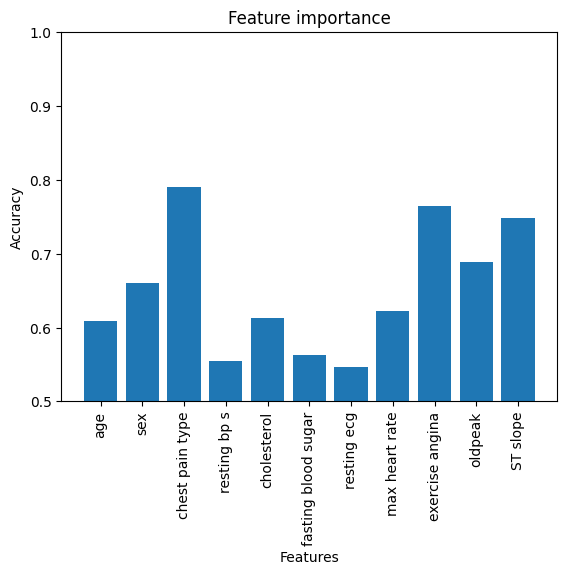

In [78]:
sl = slop_history.history['val_accuracy'][-1]
pk = peak_history.history['val_accuracy'][-1]
age = age_history.history['val_accuracy'][-1]
sex = sex_history.history['val_accuracy'][-1]
ecg = ecg_history.history['val_accuracy'][-1]
ang = ang_history.history['val_accuracy'][-1]
chest = chest_history.history['val_accuracy'][-1]
bp = bp_history.history['val_accuracy'][-1]
ch = ch_history.history['val_accuracy'][-1]
bs = bs_history.history['val_accuracy'][-1]
heart = heart_history.history['val_accuracy'][-1]
def plot_feature_importance():
  cols = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar','resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']
  vals = [age, sex, chest, bp, ch, bs, ecg, heart, ang, pk, sl]
  plt.bar(cols, vals)
  plt.ylabel('Accuracy')
  plt.ylim(.5, 1)
  plt.xlabel('Features')
  plt.title('Feature importance')
  plt.xticks(rotation=90)
  plt.show()

plot_feature_importance()

In [79]:
#['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar',
# 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


## Remove resting ecg
- val_accuracy: 0.8235
- val_loss: 0.3971
- val_precision: 0.8043
- val_recall: 0.8810

In [80]:
ETRAIN = np.delete(XTRAIN, 6, axis=1 )
EVALID = np.delete(XVALID, 6, axis=1 )
less_ecg_model = Sequential(name="less_ecg_model")
less_ecg_model.add(Input(shape=(10,)))
less_ecg_model.add(Dense(16, activation='relu'))
less_ecg_model.add(Dense(8, activation='relu'))
less_ecg_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ecg_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ecg_history = less_ecg_model.fit(ETRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(EVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.8897 - accuracy: 0.2812 - precision: 0.7019 - recall: 0.7635
Epoch 1: val_loss did not improve from 0.50927
30/30 [==============================] - 1s 10ms/step - loss: 0.7533 - accuracy: 0.4023 - precision: 0.5000 - recall: 0.6184 - val_loss: 0.7439 - val_accuracy: 0.4622 - val_precision: 0.5211 - val_recall: 0.5522
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6582 - accuracy: 0.5938 - precision: 0.6957 - recall: 0.7273
Epoch 2: val_loss did not improve from 0.50927
30/30 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.6239 - precision: 0.6266 - recall: 0.6848 - val_loss: 0.6845 - val_accuracy: 0.6429 - val_precision: 0.6929 - val_recall: 0.6567
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6054 - accuracy: 0.7812 - precision: 0.7333 - recall: 0.7857
Epoch 3: val_loss did not improve from 0.50927
30/30 [==============================] 

## Remove fasting blood sugar
- val_accuracy: 0.8067
- val_loss: 0.4022
- val_precision: 0.7941
- val_recall: 0.8571

In [81]:
FTRAIN = np.delete(ETRAIN, 5, axis=1 )
FVALID = np.delete(EVALID, 5, axis=1 )
less_fasting_model = Sequential(name="less_fasting_model")
less_fasting_model.add(Input(shape=(9,)))
less_fasting_model.add(Dense(16, activation='relu'))
less_fasting_model.add(Dense(8, activation='relu'))
less_fasting_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_fasting_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_fasting_history = less_fasting_model.fit(FTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(FVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6756 - accuracy: 0.5000 - precision: 0.8366 - recall: 0.8421
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.6008 - accuracy: 0.6733 - precision: 0.6908 - recall: 0.8203 - val_loss: 0.5715 - val_accuracy: 0.6975 - val_precision: 0.7067 - val_recall: 0.7910
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7188 - precision: 0.6316 - recall: 0.8571
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7742 - precision: 0.7545 - recall: 0.8384 - val_loss: 0.5145 - val_accuracy: 0.7605 - val_precision: 0.7895 - val_recall: 0.7836
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5077 - accuracy: 0.6875 - precision: 0.8125 - recall: 0.6500
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Remove Cholesterol
- val_accuracy: 0.8445
- val_loss: 0.3999
- val_precision: 0.8296
- val_recall: 0.8889

In [82]:
CTRAIN = np.delete(FTRAIN, 4, axis=1 )
CVALID = np.delete(FVALID, 4, axis=1 )
less_ch_model = Sequential(name="less_ch_model")
less_ch_model.add(Input(shape=(8,)))
less_ch_model.add(Dense(16, activation='relu'))
less_ch_model.add(Dense(8, activation='relu'))
less_ch_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ch_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ch_history = less_ch_model.fit(CTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(CVALID, YVALID), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
 1/30 [>.............................] - ETA: 27s - loss: 0.7076 - accuracy: 0.5625 - precision: 0.8411 - recall: 0.8355
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.6661 - accuracy: 0.6639 - precision: 0.6739 - recall: 0.8442 - val_loss: 0.6396 - val_accuracy: 0.6975 - val_precision: 0.7153 - val_recall: 0.7687
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6595 - accuracy: 0.6562 - precision: 0.6250 - recall: 0.8824
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7794 - precision: 0.7568 - recall: 0.8485 - val_loss: 0.5883 - val_accuracy: 0.7521 - val_precision: 0.7778 - val_recall: 0.7836
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7812 - precision: 0.8421 - recall: 0.8000
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Remove resting bp
- val_accuracy: 0.8151
- val_loss: 0.4053
- val_precision: 0.7887
- val_recall: 0.8889

In [83]:
RTRAIN = np.delete(CTRAIN, 3, axis=1 )
RVALID = np.delete(CVALID, 3, axis=1 )
less_resting_model = Sequential(name="less_resting_model")
less_resting_model.add(Input(shape=(7,)))
less_resting_model.add(Dense(16, activation='relu'))
less_resting_model.add(Dense(8, activation='relu'))
less_resting_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_resting_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_resting_history = less_resting_model.fit(RTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(RVALID, YVALID), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.7484 - accuracy: 0.3438 - precision: 0.8605 - recall: 0.7351
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.6535 - accuracy: 0.5410 - precision: 0.8270 - recall: 0.3116 - val_loss: 0.6366 - val_accuracy: 0.6176 - val_precision: 0.8772 - val_recall: 0.3731
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7188 - precision: 0.8889 - recall: 0.5000
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7269 - precision: 0.8507 - recall: 0.5758 - val_loss: 0.5932 - val_accuracy: 0.7227 - val_precision: 0.8696 - val_recall: 0.5970
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6139 - accuracy: 0.7188 - precision: 0.6667 - recall: 0.6154
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Removing chest pain
- val_accuracy: 0.8361
- val_loss: 0.4152
- val_precision: 0.8129
- val_recall: 0.8968

In [84]:
CTTRAIN = np.delete(RTRAIN, 2, axis=1 )
CTVALID = np.delete(RVALID, 2, axis=1 )
less_chest_model = Sequential(name="less_chest_model")
less_chest_model.add(Input(shape=(6,)))
less_chest_model.add(Dense(16, activation='relu'))
less_chest_model.add(Dense(8, activation='relu'))
less_chest_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_chest_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_chest_history = less_chest_model.fit(CTTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(CTVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.8407 - accuracy: 0.5000 - precision: 0.8141 - recall: 0.8467
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.7266 - accuracy: 0.5515 - precision: 0.5894 - recall: 0.8696 - val_loss: 0.6227 - val_accuracy: 0.6723 - val_precision: 0.6609 - val_recall: 0.8582
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6562 - precision: 0.6000 - recall: 0.9375
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.7132 - precision: 0.6768 - recall: 0.8586 - val_loss: 0.5493 - val_accuracy: 0.7605 - val_precision: 0.7692 - val_recall: 0.8209
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5486 - accuracy: 0.8125 - precision: 0.8500 - recall: 0.8500
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Remove slope
- val_accuracy: 0.8025
- val_loss: 0.4664
- val_precision: 0.8015
- val_recall: 0.8333

In [85]:
STRAIN = np.delete(CTTRAIN, 5, axis=1 )
SVALID = np.delete(CTVALID, 5, axis=1 )
less_slope_model = Sequential(name="less_slope_model")
less_slope_model.add(Input(shape=(5,)))
less_slope_model.add(Dense(16, activation='relu'))
less_slope_model.add(Dense(8, activation='relu'))
less_slope_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_slope_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_slope_history = less_slope_model.fit(STRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(SVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.8000 - accuracy: 0.2812 - precision: 0.8000 - recall: 0.7417
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.7390 - accuracy: 0.3771 - precision: 0.4924 - recall: 0.4102 - val_loss: 0.6907 - val_accuracy: 0.4790 - val_precision: 0.5424 - val_recall: 0.4776
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6908 - accuracy: 0.4688 - precision: 0.5556 - recall: 0.5263
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5326 - precision: 0.5465 - recall: 0.5939 - val_loss: 0.6363 - val_accuracy: 0.6345 - val_precision: 0.6460 - val_recall: 0.7761
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6685 - accuracy: 0.5938 - precision: 0.6190 - recall: 0.7222
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Remove Old peak
- val_accuracy: 0.7311
- val_loss: 0.5201
- val_precision: 0.7627
- val_recall: 0.7143

In [86]:
OTRAIN = np.delete(STRAIN, 4, axis=1 )
OVALID = np.delete(SVALID, 4, axis=1 )
less_old_model = Sequential(name="less_old_model")
less_old_model.add(Input(shape=(4,)))
less_old_model.add(Dense(16, activation='relu'))
less_old_model.add(Dense(8, activation='relu'))
less_old_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_old_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_old_history = less_old_model.fit(OTRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(OVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.7032 - accuracy: 0.5312 - precision: 0.8772 - recall: 0.6667
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.6399 - accuracy: 0.6218 - precision: 0.8416 - recall: 0.4308 - val_loss: 0.6465 - val_accuracy: 0.6092 - val_precision: 0.7470 - val_recall: 0.4627
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6040 - accuracy: 0.7188 - precision: 0.7333 - recall: 0.6875
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.7027 - precision: 0.7718 - recall: 0.6081 - val_loss: 0.6099 - val_accuracy: 0.6975 - val_precision: 0.7818 - val_recall: 0.6418
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7188 - precision: 0.7778 - recall: 0.7368
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

## Remove Exercise Angina
- val_accuracy: 0.7185
- val_loss: 0.5657
- val_precision: 0.7398
- val_recall: 0.7222

In [87]:
ATRAIN = np.delete(OTRAIN, 3, axis=1 )
AVALID = np.delete(OVALID, 3, axis=1 )
less_ang_model = Sequential(name="less_ang_model")
less_ang_model.add(Input(shape=(3,)))
less_ang_model.add(Dense(16, activation='relu'))
less_ang_model.add(Dense(8, activation='relu'))
less_ang_model.add(Dense(1, activation='sigmoid'))
# compile the model
less_ang_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', prec, rec])

# fit the model
less_ang_history = less_ang_model.fit(ATRAIN, YTRAIN, epochs=100, verbose=1, validation_data=(AVALID, YVALID), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
 1/30 [>.............................] - ETA: 16s - loss: 0.6697 - accuracy: 0.6875 - precision: 0.8403 - recall: 0.6757
Epoch 1: val_loss did not improve from 0.29998
30/30 [==============================] - 1s 10ms/step - loss: 0.6436 - accuracy: 0.6838 - precision: 0.8173 - recall: 0.5548 - val_loss: 0.6414 - val_accuracy: 0.6345 - val_precision: 0.7423 - val_recall: 0.5373
Epoch 2/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6744 - accuracy: 0.5312 - precision: 0.6000 - recall: 0.3529
Epoch 2: val_loss did not improve from 0.29998
30/30 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7048 - precision: 0.7688 - recall: 0.6182 - val_loss: 0.6201 - val_accuracy: 0.6555 - val_precision: 0.7364 - val_recall: 0.6045
Epoch 3/100
 1/30 [>.............................] - ETA: 0s - loss: 0.6046 - accuracy: 0.7188 - precision: 0.9000 - recall: 0.5294
Epoch 3: val_loss did not improve from 0.29998
30/30 [==============================] 

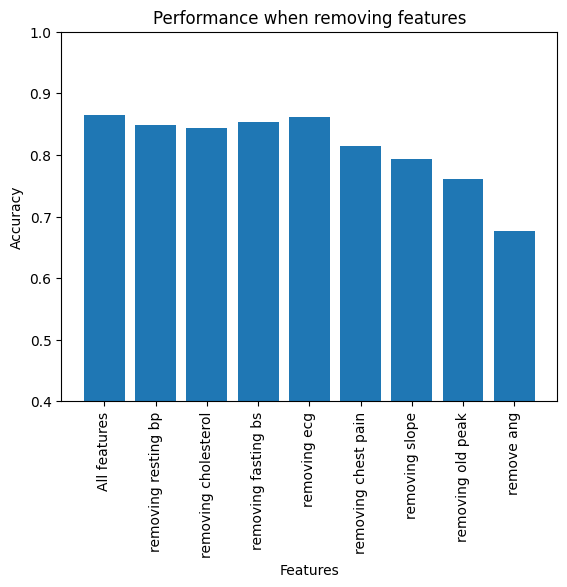

In [88]:
less_rest = less_resting_history.history['val_accuracy'][-1]
less_ch = less_ch_history.history['val_accuracy'][-1]
less_fast = less_fasting_history.history['val_accuracy'][-1]
less_ecg = less_ecg_history.history['val_accuracy'][-1]
less_slop = less_slope_history.history['val_accuracy'][-1]
less_ang = less_ang_history.history['val_accuracy'][-1]
less_chest = less_chest_history.history['val_accuracy'][-1]
less_old = less_old_history.history['val_accuracy'][-1]
all = three_layer_history.history['val_accuracy'][-1]

three_layer_history.history
def plot_feature_reduction():
  cols = ['All features', 'removing resting bp', 'removing cholesterol', 'removing fasting bs', 'removing ecg', 'removing chest pain', 'removing slope', 'removing old peak', 'remove ang']
  vals = [all, less_rest, less_ch, less_fast, less_ecg, less_chest, less_slop, less_old, less_ang]
  plt.bar(cols, vals)
  plt.ylabel('Accuracy')
  plt.xlabel('Features')
  plt.ylim(.4, 1)
  plt.title('Performance when removing features')
  plt.xticks(rotation=90)
  plt.show()

plot_feature_reduction()